In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Updated Label3.xlsx')

In [3]:
df.head()

,Lemma,Label
0,Video show Nancy Pelosi say give shoot kill ...,True
1,George Soros ban Russia Pakistan Turkey Hung...,True
2,Scientists struggle understand Antarctica wa...,True
3,Symbols Huggies diaper cod reference pedophilia,True
4,video prove government acknowledge spray sky...,True


In [4]:
df['Label'] = df['Label'].replace({ True:1,  False:0})

In [5]:
df['Lemma'].isnull().sum()

412

In [6]:
df2=df.dropna()

In [7]:
df2['Label'].unique()

array([1, 0])

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [9]:
y = df2['Label']
X_train, X_val, y_train, y_val = train_test_split(df2['Lemma'], y, test_size=0.3, stratify=y, random_state=42)

In [10]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)

In [11]:
batch_size = 1000
X_train_batches = [X_train[i:i+batch_size] for i in range(0, X_train.shape[0], batch_size)]
y_train_batches = [y_train[i:i+batch_size] for i in range(0, y_train.shape[0], batch_size)]

In [12]:
dt = DecisionTreeClassifier(max_depth= 7, min_samples_leaf= 3, min_samples_split= 2)
rf = RandomForestClassifier(n_estimators=500,min_samples_split= 2, random_state=42)
svm = SVC(kernel='poly', C=10, gamma='scale', random_state=42,class_weight='balanced')
gb = GradientBoostingClassifier(learning_rate= 1, max_depth= 5, n_estimators= 700)
nb = MultinomialNB(alpha = 0.01, fit_prior= True)
from sklearn.ensemble import  VotingClassifier
ensemble = VotingClassifier([ ('dt', dt),('rf',rf),('svm', svm),('gb',gb),('nb',nb)], voting='hard')

In [ ]:
for i in range(len(X_train_batches)):
    ensemble.fit(X_train_batches[i], y_train_batches[i])

In [ ]:
y_pred = ensemble.predict(X_val)
print(f"Batch {i+1} classification report:")
print(classification_report(y_val, y_pred))

Batch 77 classification report:
              precision    recall  f1-score   support

           0       0.57      0.40      0.47     15442
           1       0.58      0.73      0.65     17419

    accuracy                           0.57     32861
   macro avg       0.57      0.56      0.56     32861
weighted avg       0.57      0.57      0.56     32861



In [ ]:
df4=pd.read_excel('/content/drive/MyDrive/FYP VIVA Presentation/unlabelled data2.xlsx')

In [ ]:
df7=df4[['Lemma','clusters']]

In [ ]:
df7 = df7.rename(columns={'clusters': 'Label'})

In [ ]:
X_test = df7['Lemma']
X_test_transformed = vectorizer.transform(X_test)
y_pred_test = ensemble.predict(X_test_transformed)

In [ ]:
y_true=df7['Label']

In [ ]:
print(classification_report(y_true, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       880
           1       0.87      1.00      0.93      5765

    accuracy                           0.87      6645
   macro avg       0.43      0.50      0.46      6645
weighted avg       0.75      0.87      0.81      6645



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


probas = ensemble.predict_proba(X_val)[:, 1]


fpr, tpr, thresholds = roc_curve(y_val, probas)


roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import random

# Select a random row index from Data2
random_index = random.randint(0, len(df7)-1)

# Get the text from the randomly selected row
text =df7.iloc[random_index]['Lemma']

# Transform the text using the vectorizer
text_transformed = vectorizer.transform([text])

# Use the model to predict the label of the text
label_pred = ensemble.predict(text_transformed)

# Print the text and predicted label
print("Text: ", text)
if label_pred == 1:
    print('The text is classified as TRUE')
else:
    print('The text is classified as FALSE')
#print("Predicted Label: ", label_pred[0])

Text:    AK use fatal shooting Isabella Thallas belong Denver police officer Dan Politica
The text is classified as TRUE


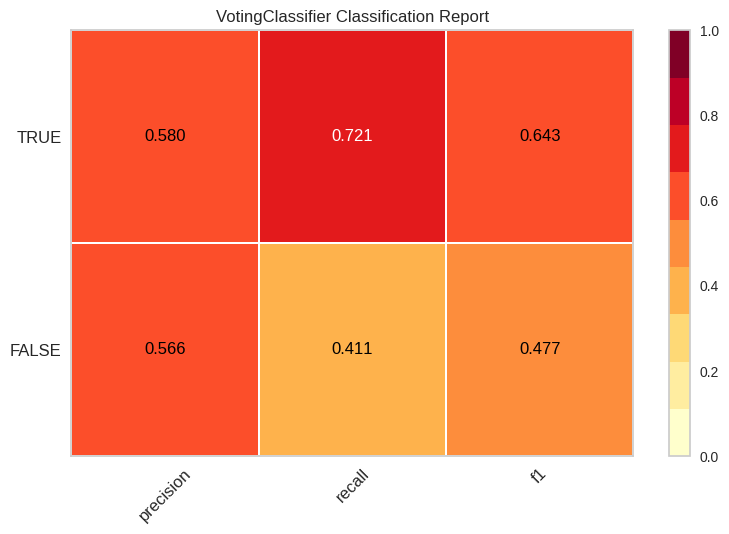

<Axes: title={'center': 'VotingClassifier Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(ensemble, classes=['FALSE', 'TRUE'])
visualizer.fit(X_train_batches[i], y_train_batches[i])
visualizer.score(X_val, y_val)
visualizer.show()

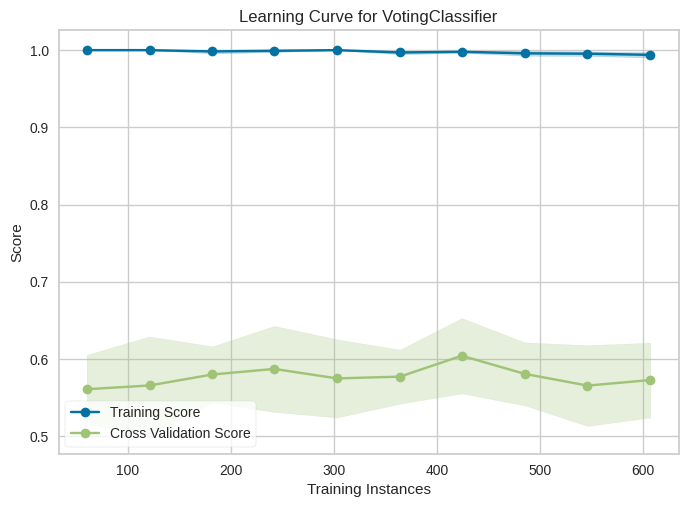

<Axes: title={'center': 'Learning Curve for VotingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

lc_viz = LearningCurve(
    ensemble, cv=cv, scoring='f1_weighted', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

lc_viz.fit(X_train_batches[i], y_train_batches[i])
lc_viz.show()